**Q1. Import the required libraries**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q2.import csv file Diwali Sales Data.csv**

In [22]:
try:
    df = pd.read_csv('/content/Diwali_Sales_Data.csv', encoding='latin-1')
except UnicodeDecodeError:
    # If 'latin-1' also fails, try 'cp1252' which is another common Windows encoding
    try:
        df = pd.read_csv('/content/Diwali_Sales_Data.csv', encoding='cp1252')
    except Exception as e:
        print(f"Could not read the file with 'latin-1' or 'cp1252'. Original error: {e}")


**Q3. Find the shape of the data**

In [24]:
df.shape

(11251, 15)

**Q4. Fetch the first five rows of the dataset**

In [25]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


**Q5. Get the complete info of the dataset**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


**Q6. Drop unrelated/blank columns 'Status' and 'unnamed1'**

In [29]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

**Q7. Check for null values and find which columns have null values**

In [30]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [32]:
df.dropna(inplace=True)

**Q8. Calculate the mean value of Age, Orders and Amount by using describe function**

In [33]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


**Q9. Plot a bar chart for Gender and it's count**

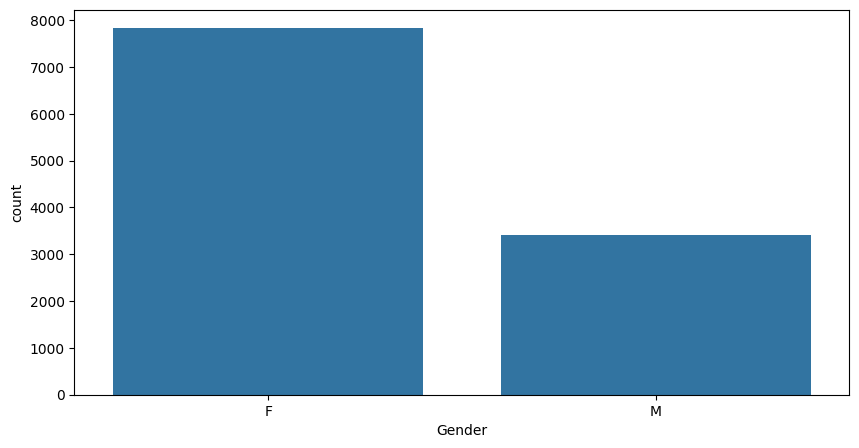

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df)
plt.show()

**Q10. Plot a bar chart for gender vs total amount**

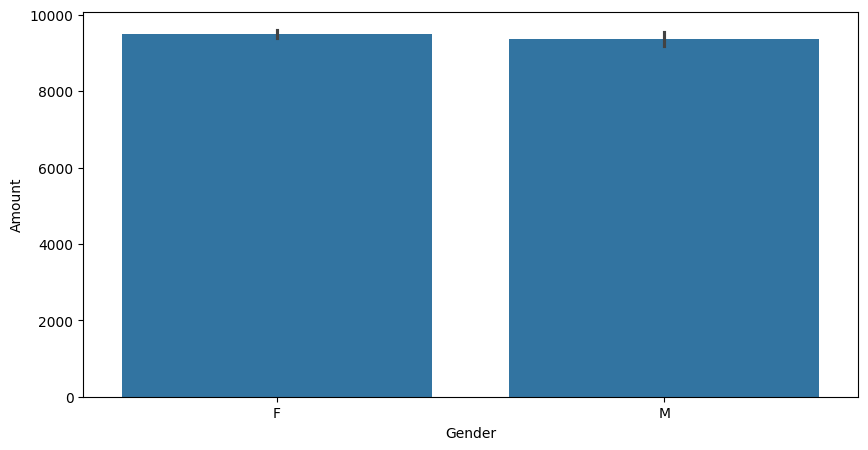

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x='Gender',y='Amount',data=df)
plt.show()

**Q11. Plot the countplot for Age Group with hue and Gender**

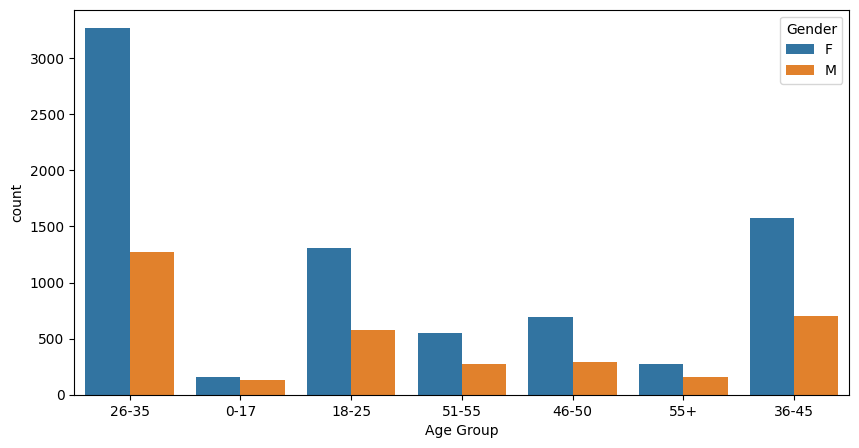

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age Group',hue='Gender',data=df)
plt.show()

**Q12. Draw the plot for total number of orders from top 10 states**

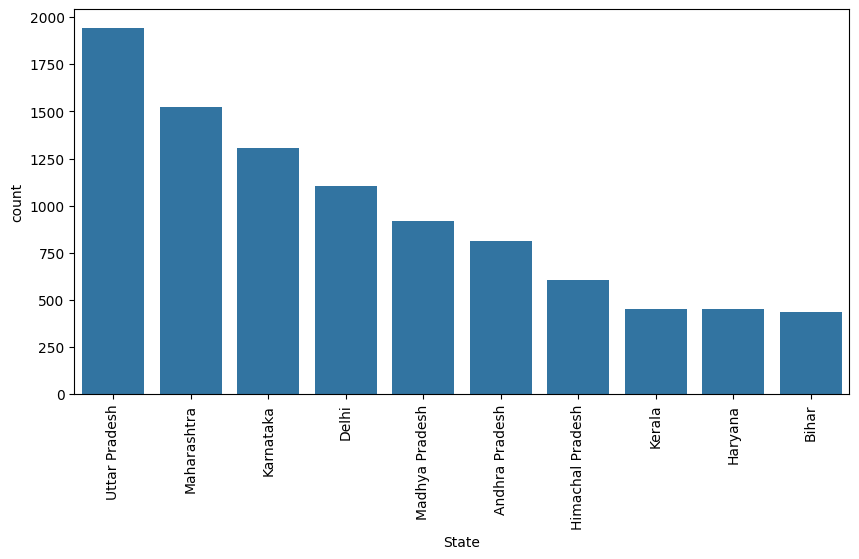

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='State',data=df,order=df.State.value_counts().head(10).index)
plt.xticks(rotation=90)
plt.show()

**Q13.Draw the plot to plot total amount/sales from top 10 states**

<ipython-input-40-00df51fadb7a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='rocket')


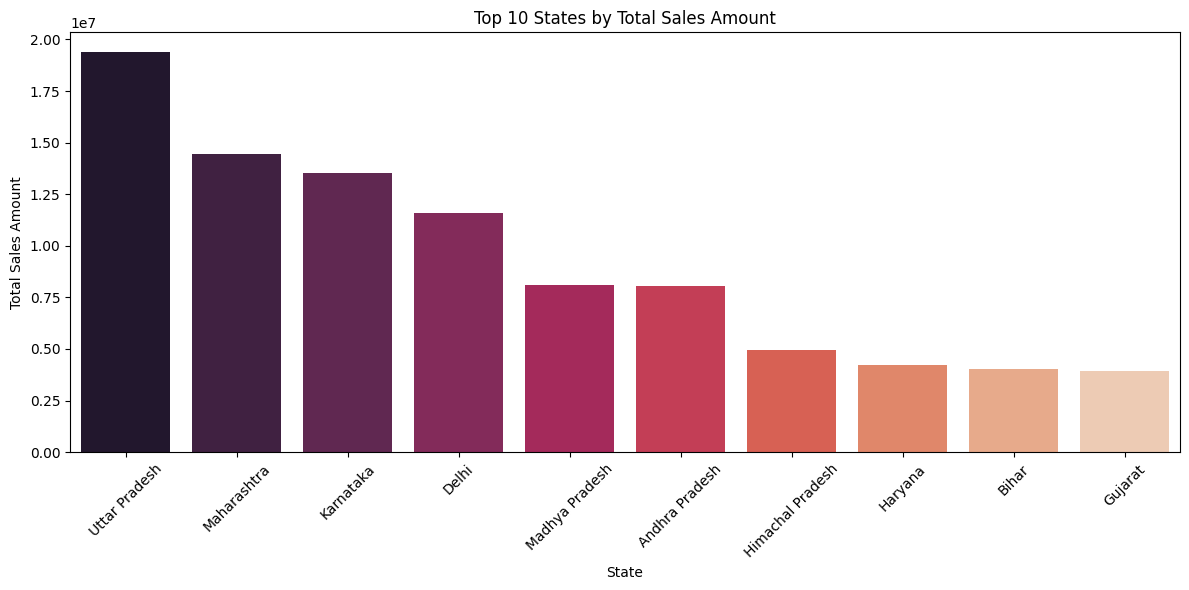

In [40]:
top_states = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_states.index, y=top_states.values, palette='rocket')
plt.title('Top 10 States by Total Sales Amount')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q14. Draw the plot to show the marital status**

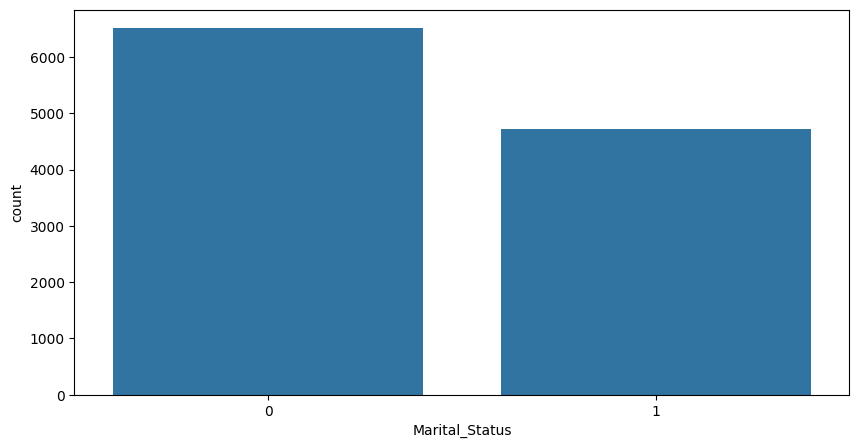

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='Marital_Status',data=df)
plt.show()